# Tutorial 3: Antigen Specificity Prediction

Fine-tune TCRfoundation for predicting antigen specificity from TCR sequences and gene expression.

## 1. Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import scanpy as sc
import tcrfoundation as tcrf
from tcrfoundation.finetune.utils import build_results_dataframe, plot_all_metrics_bubble_chart

## 2. Configuration

In [3]:
checkpoint_path = "../TCR_foundation_model/foundation_model_best.pt"
results_dir = "../results/specificity"
num_epochs = 2 # Just for demonstration. When training from scratch, please set the epoachs as 50.
batch_size = 512

os.makedirs(results_dir, exist_ok=True)

## 3. Load Data

In [4]:
adata = sc.read("../data/speci_adata.h5ad")
print(f"Dataset: {adata.n_obs} cells, {adata.n_vars} genes")
print(f"Antigens: {adata.obs['binding_name'].nunique()} unique")

Dataset: 60114 cells, 3000 genes
Antigens: 8 unique


## 4. Train Specificity Classifier

In [5]:
results, adata_updated = tcrf.finetune.specificity.train_specificity_classifier(
    adata, 
    label_column="binding_name",
    checkpoint_path=checkpoint_path,
    num_epochs=num_epochs, 
    batch_size=batch_size
)

Number of classes: 8, Classes: ['A0201_ELAGIGILTV_MART-1_Cancer_binder', 'A0201_GILGFVFTL_Flu-MP_Influenza_binder', 'A0201_GLCTLVAML_BMLF1_EBV_binder', 'A0301_KLGGALQAK_IE-1_CMV_binder', 'A0301_RLRAEAQVK_EMNA-3A_EBV_binder', 'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder', 'A1101_IVTDFSVIK_EBNA-3B_EBV_binder', 'B0801_RAKFKQLL_BZLF1_EBV_binder']
Loaded model with max_length: 30

==================== Training binding_name classifier: rna_only ====================
Loaded model with max_length: 30


Mode rna_only Epoch 1/2: Train Loss = 0.8529 | Val Loss = 0.6481 | Val Acc = 0.8000
--> Best model saved with Val Acc = 0.8000


Mode rna_only Epoch 2/2: Train Loss = 0.6360 | Val Loss = 0.6245 | Val Acc = 0.8049
--> Best model saved with Val Acc = 0.8049



==================== Training binding_name classifier: tcr_only ====================
Loaded model with max_length: 30


Mode tcr_only Epoch 1/2: Train Loss = 0.6180 | Val Loss = 0.3954 | Val Acc = 0.8919
--> Best model saved with Val Acc = 0.8919


Mode tcr_only Epoch 2/2: Train Loss = 0.3810 | Val Loss = 0.3347 | Val Acc = 0.9160
--> Best model saved with Val Acc = 0.9160



==================== Training binding_name classifier: tcra_only ====================
Loaded model with max_length: 30


Mode tcra_only Epoch 1/2: Train Loss = 0.7298 | Val Loss = 0.5022 | Val Acc = 0.8660
--> Best model saved with Val Acc = 0.8660


Mode tcra_only Epoch 2/2: Train Loss = 0.4746 | Val Loss = 0.4163 | Val Acc = 0.8968
--> Best model saved with Val Acc = 0.8968



==================== Training binding_name classifier: tcrb_only ====================
Loaded model with max_length: 30


Mode tcrb_only Epoch 1/2: Train Loss = 0.8064 | Val Loss = 0.5314 | Val Acc = 0.8597
--> Best model saved with Val Acc = 0.8597


Mode tcrb_only Epoch 2/2: Train Loss = 0.5356 | Val Loss = 0.4554 | Val Acc = 0.8839
--> Best model saved with Val Acc = 0.8839

==================== Training binding_name classifier: rna_tcr ====================
Loaded model with max_length: 30


Mode rna_tcr Epoch 1/2: Train Loss = 0.4879 | Val Loss = 0.2819 | Val Acc = 0.9296
--> Best model saved with Val Acc = 0.9296


Mode rna_tcr Epoch 2/2: Train Loss = 0.2722 | Val Loss = 0.2525 | Val Acc = 0.9357
--> Best model saved with Val Acc = 0.9357

=== Extracting embeddings and predictions for binding_name ===
Loaded model with max_length: 30

Extracting embeddings and predictions for rna_only modality...


Processing rna_only: 100%|██████████████████████████████████| 59/59 [00:02<00:00, 20.75it/s]


Stored embedding in adata.obsm['X_binding_name_rna_only_emb'] with shape (60114, 128)
Stored predictions in adata.obs['binding_name_rna_only_pred']

Extracting embeddings and predictions for tcr_only modality...


Processing tcr_only: 100%|██████████████████████████████████| 59/59 [00:02<00:00, 20.25it/s]


Stored embedding in adata.obsm['X_binding_name_tcr_only_emb'] with shape (60114, 256)
Stored predictions in adata.obs['binding_name_tcr_only_pred']

Extracting embeddings and predictions for tcra_only modality...


Processing tcra_only: 100%|█████████████████████████████████| 59/59 [00:02<00:00, 20.24it/s]


Stored embedding in adata.obsm['X_binding_name_tcra_only_emb'] with shape (60114, 128)
Stored predictions in adata.obs['binding_name_tcra_only_pred']

Extracting embeddings and predictions for tcrb_only modality...


Processing tcrb_only: 100%|█████████████████████████████████| 59/59 [00:02<00:00, 20.24it/s]


Stored embedding in adata.obsm['X_binding_name_tcrb_only_emb'] with shape (60114, 128)
Stored predictions in adata.obs['binding_name_tcrb_only_pred']

Extracting embeddings and predictions for rna_tcr modality...


Processing rna_tcr: 100%|███████████████████████████████████| 59/59 [00:02<00:00, 19.81it/s]

Stored embedding in adata.obsm['X_binding_name_rna_tcr_emb'] with shape (60114, 256)
Stored predictions in adata.obs['binding_name_rna_tcr_pred']


## 5. Save Results

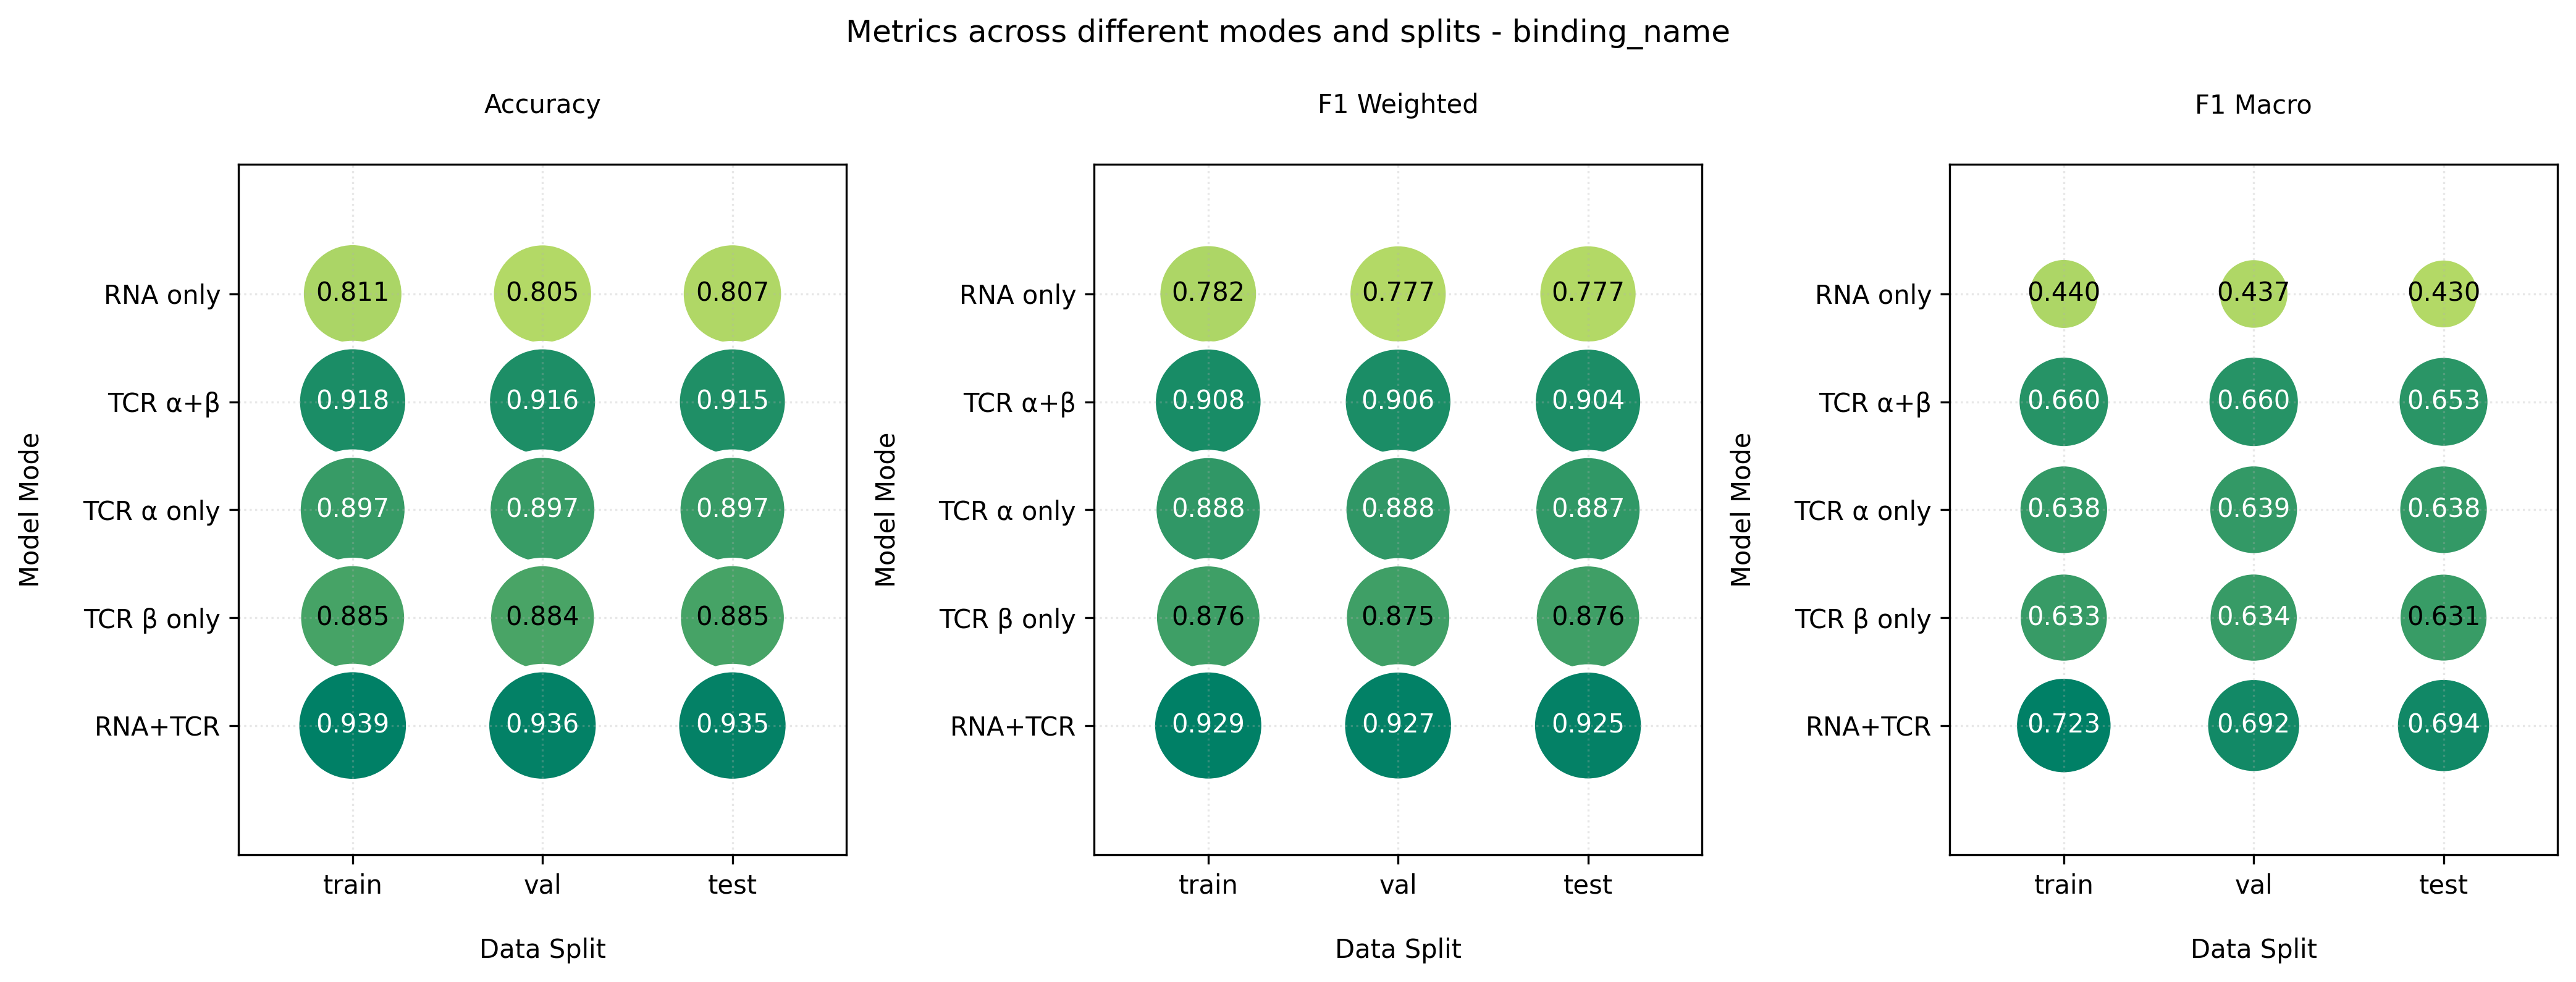


Results saved to: ../results/specificity


In [6]:
# Save adata
adata_updated.write(f"{results_dir}/adata_binding_name.h5ad")

# Save metrics
df = build_results_dataframe(results)
df.to_csv(f"{results_dir}/binding_name_results.csv", index=False)

# Create visualization
plot_all_metrics_bubble_chart(df, results_dir, "binding_name")

print("\nResults saved to:", results_dir)

## 6. Performance Summary

In [7]:
print("\n" + "="*60)
print("Performance by Modality")
print("="*60)
print(df)

print("\n" + "="*60)
for mode, metrics in results.items():
    test_acc, test_f1_macro, test_f1_weighted = metrics['test']
    print(f"{mode:15s}: Acc={test_acc:.3f}, F1-macro={test_f1_macro:.3f}")


Performance by Modality
         Mode  Split  Accuracy  F1 Weighted  F1 Macro
0    rna_only  train  0.810856     0.782192  0.440004
1    rna_only    val  0.804924     0.776947  0.436638
2    rna_only   test  0.807053     0.777181  0.430111
3    tcr_only  train  0.918392     0.907944  0.659940
4    tcr_only    val  0.916047     0.906349  0.659977
5    tcr_only   test  0.914837     0.904417  0.653300
6   tcra_only  train  0.897431     0.887603  0.638441
7   tcra_only    val  0.896751     0.887648  0.639294
8   tcra_only   test  0.896984     0.887002  0.637773
9   tcrb_only  train  0.885477     0.876032  0.632752
10  tcrb_only    val  0.883886     0.875196  0.633631
11  tcrb_only   test  0.885451     0.875628  0.630690
12    rna_tcr  train  0.938734     0.929175  0.723491
13    rna_tcr    val  0.935677     0.926523  0.692007
14    rna_tcr   test  0.935462     0.925458  0.694275

rna_only       : Acc=0.807, F1-macro=0.430
tcr_only       : Acc=0.915, F1-macro=0.653
tcra_only      : Acc=0.8